In [286]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10

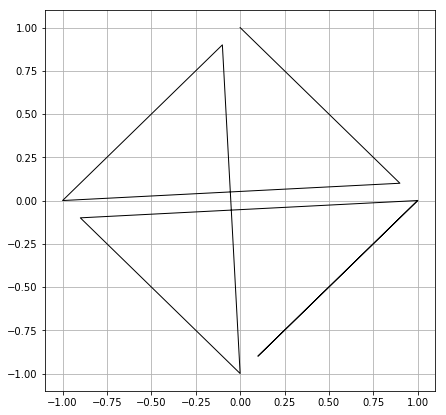

In [4]:
x = np.array([1, 1j, -1, -1j, 1])

# type casting
X = 1j*np.zeros(40 + 1)
X[::10] = x

for n in range(4):
    X[10*n:10*(n+1)] = np.arange(0, 1, 0.1)*X[10*n] + np.arange(1,0,-0.1)*X[10*(n+1)]
    
plt.plot(X.real, X.imag, 'k-', linewidth=1)

plt.grid(True)

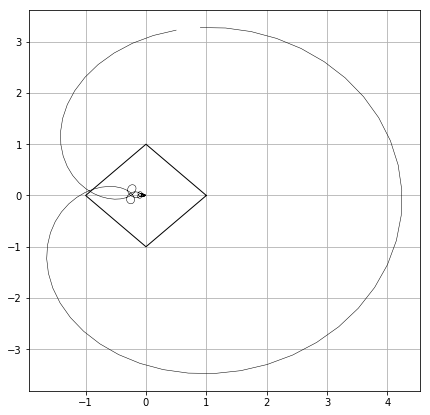

In [41]:
x = np.array([1, 1j, -1, -1j, 1])

# type casting
X = 1j*np.zeros(40 + 1)
X[::10] = x

# linear interpolation
for n in range(4):
    X[10*n:10*(n+1)] = np.arange(1,0,-0.1)*X[10*n] + np.arange(0, 1, 0.1)*X[10*(n+1)]
    
plt.plot(X.real, X.imag, 'k-', linewidth =1)
plt.grid(True)

# FFT
dt = 1.0/40
t  = np.arange(0, 1, dt)
F = np.exp(2j*np.pi*t[None,...]*np.arange(40)[...,None]*(1.0/40)).T
A = np.dot(F, X[:-1])*(1.0/40)

# reconstruct function from Fourier series
t = np.arange(0,1,0.001)

z = 0j*t
for n in range(40):
    z += A[n]*np.exp(-2j*np.pi*n*t)
    
plt.plot(z.real, z.imag, 'k-', linewidth=0.5)

In [42]:
A.real, A.imag

(array([ 2.22044605e-17,  1.92059947e-02,  3.73010090e-02,  5.39376684e-02,
         6.88155670e-02,  8.16853784e-02,  9.23518370e-02,  1.00675557e-01,
         1.06573686e-01,  1.10019399e-01,  1.11040293e-01,  1.09715714e-01,
         1.06173131e-01,  1.00583625e-01,  9.31566315e-02,  8.41340551e-02,
         7.37838914e-02,  6.23935098e-02,  5.02627391e-02,  3.76969100e-02,
         2.50000000e-02,  1.24680220e-02,  3.82791558e-04, -1.09938066e-02,
        -2.14249434e-02, -3.07032686e-02, -3.86545563e-02, -4.51405146e-02,
        -5.00607230e-02, -5.33536759e-02, -5.49969375e-02, -5.50064241e-02,
        -5.34348574e-02, -5.03694407e-02, -4.59288332e-02, -4.02595058e-02,
        -3.35315773e-02, -2.59342351e-02, -1.76708565e-02, -8.95394468e-03]),
 array([-1.66533454e-17, -4.55998108e-04,  1.94828843e-03,  6.94731953e-03,
         1.42365407e-02,  2.34798525e-02,  3.43174750e-02,  4.63740412e-02,
         5.92667518e-02,  7.26134267e-02,  8.60402926e-02,  9.91893572e-02,
         1

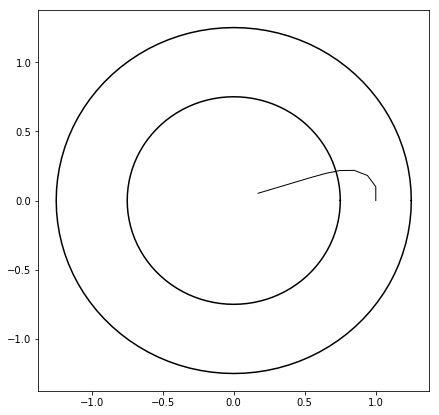

In [103]:
# reflecting random walk in an annulus.

X = [ 1 ]

dt = 0.1

for t in range(10):
    theta = np.angle(X[-1])
    v  = 1j*np.exp(2j*np.pi*theta)
    dX = v*dt
    
    R = np.abs( X[-1] + dX )
    #if R < 1.25 and R > 0.75:
    if True:
        X += [ X[-1] + v*dt ]
        #V += [ v ]
        
X = np.array(X)
plt.plot(X.real, X.imag, 'k-', linewidth=1)

t = np.arange(0, 1.01, 0.01)
z = 0.75*np.exp(2j*np.pi*t)
plt.plot(z.real, z.imag, 'k-')
z = 1.25*np.exp(2j*np.pi*t)
plt.plot(z.real, z.imag, 'k-')

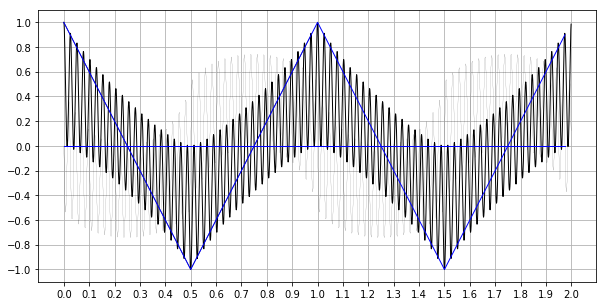

In [72]:
x = np.array([1,0,-1,0,1])

N = 10

X = np.zeros(4*N+1)

X[::N] = x

for n in np.arange(4):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
 
dt = 1.0/(4*N)
t = np.arange(0,1,dt)

plt.plot(t, X[:-1], 'k-', linewidth=0.5)

#for n in range(4*N):
#    plt.plot(t, X[:-1]*np.exp(n*2j*np.pi*t), 'k-', linewidth=0.1)
    
#plt.plot(t, X[:-1]*np.exp(10*2j*np.pi*t), 'k-', linewidth=1)
plt.xticks(np.arange( 0,2.01, 0.1))
plt.yticks(np.arange(-1,1.01, 0.2))
plt.grid(True)

F    = np.exp(  np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

A = np.dot(F, X[:-1])*dt

I = np.dot(F, Finv)/40

t    = np.arange(0,2,10**-3)
Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

Y = np.dot( Finv , A )

z = 0j*t
for n in range(40):
    z += A[n]*np.exp(-2j*np.pi*n*t)
plt.plot(t, z.real, 'k-',  linewidth=1)
plt.plot(t, z.imag, 'k-',  linewidth=0.1)

t    = np.arange(0,2,1.0/40)
Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

Y = np.dot( Finv , A )

z = 0j*t
for n in range(40):
    z += A[n]*np.exp(-2j*np.pi*n*t)
plt.plot(t, z.real, 'b-',  linewidth=1)
plt.plot(t, z.imag, 'b-',  linewidth=1)

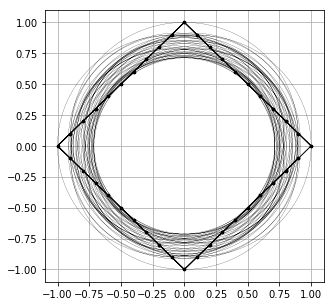

In [104]:
x = np.array([1,0,-1,0,1])

N = 10
X = np.zeros(4*N+1)
X[::N] = x

for n in np.arange(4):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
    
y = np.array([0,1,0,-1,0])

N = 10
Y = np.zeros(4*N+1)
Y[::N] = y

for n in np.arange(4):
    Y[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*Y[N*n] + np.arange(0,1,1.0/N)*Y[N*(n+1)]
 
dt = 1.0/(4*N)
t = np.arange(0,1,dt)

F    = np.exp(  np.arange(4*N)[None,...]*2j*np.pi*t[...,None])
Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

I = np.dot(F, Finv)/40

t    = np.arange(0,2, 1.0/(4*10**3))
Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

Z = X + 1j*Y
A = np.dot(F, Z[:-1])*dt
Z1 = np.dot( Finv , A )

plt.plot(Z1.real, Z1.imag, 'k-',  linewidth=0.1)


plt.plot(Z1.real[::100], Z1.imag[::100], 'k.',  markersize=5)
plt.plot(Z1.real[::100], Z1.imag[::100], 'k-',  linewidth=1)

plt.grid(True)

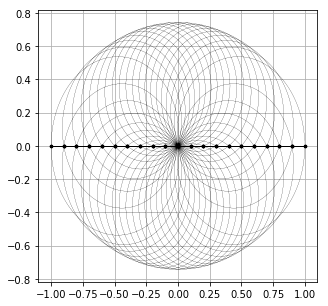

In [109]:
x = np.array([1,1j,-1,-1j,1]).real

N = 10
X = 0j*np.zeros(4*N+1)
X[::N] = x

for n in np.arange(4):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
    

 
dt = 1.0/(4*N)
t = np.arange(0,1,dt)

F    = np.exp(  np.arange(4*N)[None,...]*2j*np.pi*t[...,None])
Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])

I = np.dot(F, Finv)/40

t    = np.arange(0,2, 1.0/(4*10**3))
Finv = np.exp( -np.arange(4*N)[None,...]*2j*np.pi*t[...,None])


A = np.dot(F, X[:-1])*dt
X1 = np.dot( Finv , A )

plt.plot(X1.real, X1.imag, 'k-',  linewidth=0.1)


plt.plot(X1.real[::100], X1.imag[::100], 'k.',  markersize=5)
plt.plot(X1.real[::100], X1.imag[::100], 'k-',  linewidth=1)

plt.grid(True)

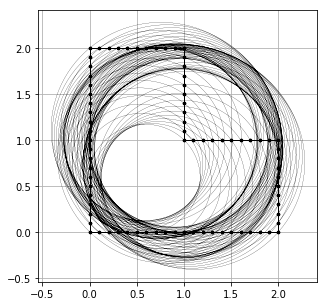

In [118]:
x = np.array([0, 1, 2, 2+1j, 1+1j, 1+2j, 2j, 1j, 0])

#x = np.array([2, 2+1j, 1+1j, 1+2j, 2j, 1j, -1+1j, -1, 0, -1j, 1-1j, 1, 2])

m = len(x)-1

N = 10
X = 0j*np.zeros(m*N + 1)
X[::N] = x

for n in np.arange(m):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
    

 
dt = 1.0/(m*N)
t = np.arange(0,1,dt)

F    = np.exp(  np.arange(m*N)[None,...]*2j*np.pi*t[...,None])
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])

I = np.dot(F, Finv)/(m*N)

t    = np.arange(0,2, 1.0/(m*10**3))
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])


A = np.dot(F, X[:-1])*dt
X1 = np.dot( Finv , A )

plt.plot(X1.real, X1.imag, 'k-',  linewidth=0.1)


plt.plot(X1.real[::100], X1.imag[::100], 'k.',  markersize=5)
plt.plot(X1.real[::100], X1.imag[::100], 'k-',  linewidth=1)

plt.grid(True)

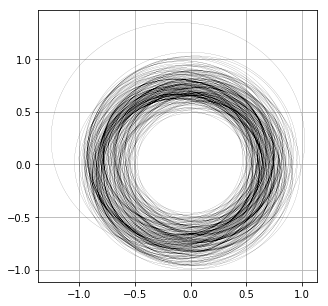

In [124]:
x = 0j*np.zeros(20)
x[::2] = np.exp(2j*np.pi*np.arange(10)*0.1)

x[1::2] = 0.5*np.exp(2j*np.pi*np.arange(10)*0.1)

m = len(x)-1

N = 10
X = 0j*np.zeros(m*N + 1)
X[::N] = x

for n in np.arange(m):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
    

 
dt = 1.0/(m*N)
t = np.arange(0,1,dt)

F    = np.exp(  np.arange(m*N)[None,...]*2j*np.pi*t[...,None])
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])

I = np.dot(F, Finv)/(m*N)

t    = np.arange(0,2, 1.0/(m*10**3))
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])


A = np.dot(F, X[:-1])*dt
X1 = np.dot( Finv , A )

plt.plot(X1.real, X1.imag, 'k-',  linewidth=0.05)


#plt.plot(X1.real[::10], X1.imag[::10], 'k.',  markersize=5)
#plt.plot(X1.real[::10], X1.imag[::10], 'k-',  linewidth=1)

plt.grid(True)

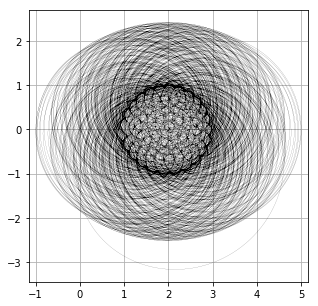

In [148]:
x = 0j*np.zeros(50)
x[ ::2] =     np.exp(2j*np.pi*np.arange(25)*(1.0/25))
x[1::2] = 4 + np.exp(2j*np.pi*np.arange(25)*(1.0/25))

#plt.plot(x.real, x.imag, 'k.',  markersize=5)

m = len(x)-1

N = 10
X = 0j*np.zeros(m*N + 1)
X[::N] = x

for n in np.arange(m):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
    

 
dt = 1.0/(m*N)
t = np.arange(0,1,dt)

F    = np.exp(  np.arange(m*N)[None,...]*2j*np.pi*t[...,None])
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])

I = np.dot(F, Finv)/(m*N)

t    = np.arange(0,2, 1.0/(m*10**3))
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])


A = np.dot(F, X[:-1])*dt
X1 = np.dot( Finv , A )

plt.plot(X1.real, X1.imag, 'k-',  linewidth=0.05)


#plt.plot(X1.real[::10], X1.imag[::10], 'k.',  markersize=1)
#plt.plot(X1.real[::100], X1.imag[::100], 'k.',  markersize=5)
#plt.plot(X1.real[::10], X1.imag[::10], 'k-',  linewidth=1)
plt.axis("Equal")
plt.grid(True)

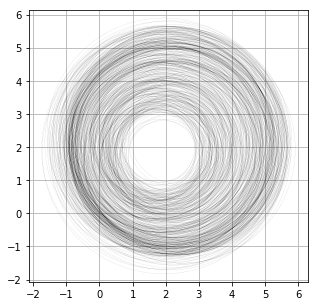

In [149]:
x = 0j*np.zeros(40)
x[ ::4] =     np.exp(2j*np.pi*np.arange(10)*(1.0/10))
x[1::4] = 4  + np.exp(2j*np.pi*(1 + np.arange(10))*(1.0/10))
x[2::4] = 4  + 4j + np.exp(2j*np.pi*np.arange(10)*(1.0/10))
x[3::4] = 4j + np.exp(2j*np.pi*np.arange(10)*(1.0/10))

#plt.plot(x.real, x.imag, 'k.',  markersize=5)

m = len(x)-1

N = 10
X = 0j*np.zeros(m*N + 1)
X[::N] = x

for n in np.arange(m):
    X[N*n:N*(n+1)] = np.arange(1,0,-1.0/N)*X[N*n] + np.arange(0,1,1.0/N)*X[N*(n+1)]
    

 
dt = 1.0/(m*N)
t = np.arange(0,1,dt)

F    = np.exp(  np.arange(m*N)[None,...]*2j*np.pi*t[...,None])
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])

I = np.dot(F, Finv)/(m*N)

t    = np.arange(0,2, 1.0/(m*10**3))
Finv = np.exp( -np.arange(m*N)[None,...]*2j*np.pi*t[...,None])


A = np.dot(F, X[:-1])*dt
X1 = np.dot( Finv , A )

plt.plot(X1.real, X1.imag, 'k-',  linewidth=0.02)


#plt.plot(X1.real[::10], X1.imag[::10], 'k.',  markersize=1)
#plt.plot(X1.real[::100], X1.imag[::100], 'k.',  markersize=5)
#plt.plot(X1.real[::10], X1.imag[::10], 'k-',  linewidth=1)
plt.axis("Equal")
plt.grid(True)

([], <a list of 0 Text yticklabel objects>)

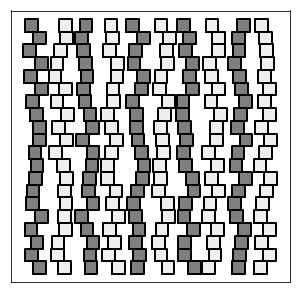

In [186]:
sq = np.array([0, 1, 1+1j, 1j, 0])

for a in range(10):
    for b in range(20):
        z = (2*a+1j*b) + sq + (np.random.random() - 0.5)
        if a % 2 == 0:
            plt.fill(z.real, z.imag, 'k-', alpha=0.5)
            plt.plot(z.real, z.imag, 'k-', linewidth=2)
        else:
            plt.fill(z.real, z.imag, '-', color = "#E0E0E0", alpha=0.5)
            plt.plot(z.real, z.imag, 'k-', linewidth=2)
            
plt.axis("Equal")
plt.grid(True)
plt.xticks([])
plt.yticks([])

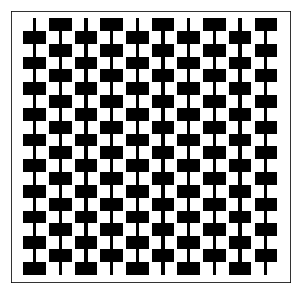

In [184]:
sq = np.array([0, 1, 1+1j, 1j, 0])

for a in range(20):
    for b in range(20):
        if a % 2 == 0:
            L = 0.5*(1 + ((-1)**((a/2)+b))*0.75 )
            rect = np.array([-L, L, L+1j, -L+1j])
            z = rect + (a+1j*b)
            plt.fill(z.real, z.imag, 'k-')
        else:
            pass
            
plt.axis("Equal")
plt.xticks([])
plt.yticks([])
#plt.axis("Off")
plt.grid(True)

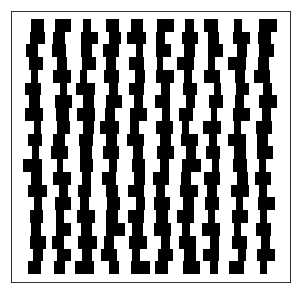

In [191]:
sq = np.array([0, 1, 1+1j, 1j, 0])

for a in range(20):
    for b in range(20):
        if a % 2 == 0:
            L = 0.5*(1 + ((-1)**((a/2)+b))*np.random.random()*0.5 )
            rect = np.array([-L, L, L+1j, -L+1j])
            z = rect + (a+1j*b) + 0.5*(np.random.random() - 0.5)
            plt.fill(z.real, z.imag, 'k-')
        else:
            pass
            
plt.axis("Equal")
plt.xticks([])
plt.yticks([])
#plt.axis("Off")
plt.grid(True)

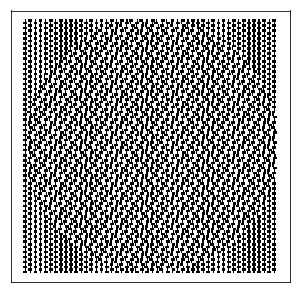

In [203]:
sq = np.array([0, 1, 1+1j, 1j, 0])

for a in range(100):
    for b in range(100):
        if a % 2 == 0:
            if  (a-50)**2 + (b - 50)**2 < 50**2 :
                L = 0.5*(1 + ((-1)**((a/2)+b))*0.5 )
                rect = np.array([-L, L, L+1j, -L+1j])
                z = rect + (a+1j*b) + ((a+b)%5 - 2.5)*(1.0/5)
                plt.fill(z.real, z.imag, 'k-')
            else:
                L = 0.5*(1 + ((-1)**((a/2)+b))*0.5 )
                rect = np.array([-L, L, L+1j, -L+1j])
                z = rect + (a+1j*b)
                plt.fill(z.real, z.imag, 'k-')
        else:
            pass
            
plt.axis("Equal")
plt.xticks([])
plt.yticks([])
#plt.axis("Off")
plt.grid(True)

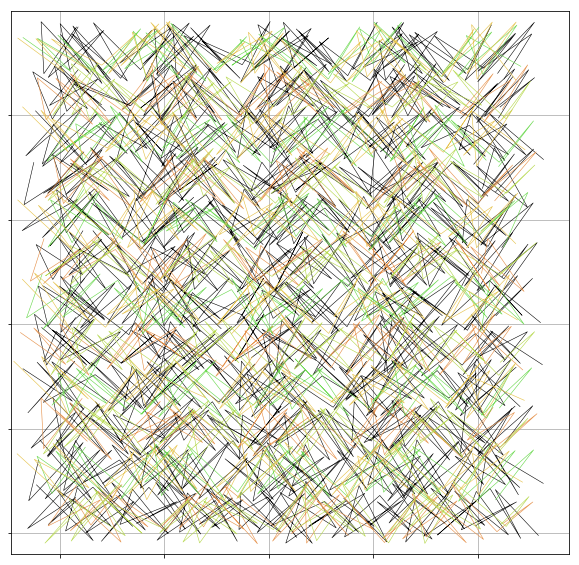

In [290]:
x = [1,-1,1,-1,1,-1, -2,0 , -2,0,-2,0]
x = np.array(x)
y = [1,-1]
y = np.array(y)


for b in range(2):
    for a in range(12):

        N = 50
        n = np.arange(N) 

        dn = int(8*np.random.random())

        X = np.zeros(N)
        Y = np.zeros(N)

        X = x[(n + dn) % 12] + 0.45*n + 0.5*(np.random.random(N) - 0.5)
        Y = y[n % 2] + 1 + 2*a + 1*(np.random.random(N) - 0.5)

        plt.plot(X,Y, 'k-', linewidth=0.55)

        #plt.plot(X,Y, 'k.', markersize=1)
    
for a in range(12):
    
    N = 50
    n = np.arange(N) 
    
    dn = int(8*np.random.random())

    X = np.zeros(N)
    Y = np.zeros(N)

    X = x[(n + dn) % 12] + 0.45*n + 0.5*(np.random.random(N) - 0.5)
    Y = y[n % 2] + 1 + 2*a + 1*(np.random.random(N) - 0.5)

    if (a % 2 == 0):
        plt.plot(X,Y, '-', color="#E6924C", linewidth=0.6)
    if (a % 2 == 1):
        plt.plot(X,Y, '-', color="#6CD950" , linewidth=0.6)

        
for a in range(12):
    
    N = 50
    n = np.arange(N) 
    
    dn = 0*int(12*np.random.random()) + ((6*a)%12)

    X = np.zeros(N)
    Y = np.zeros(N)

    X = x[(n + dn) % 12] + 0.45*n + 0.5*(np.random.random(N) - 0.5)
    Y = y[n % 2] + 1 + 2*a + 1*(np.random.random(N) - 0.5)

    if (a % 2 == 0):
        plt.plot(X,Y, '-', color="#B7D950", linewidth=0.6)
    if (a % 2 == 1):
        plt.plot(X,Y, '-', color="#E6C34E" , linewidth=0.6)

plt.axis("Equal")

plt.xticks(5*np.arange(5), ["" for n in range(5)] )
plt.yticks(5*np.arange(5), ["" for n in range(5)] )

plt.xlim([-2,24])
plt.ylim([-1,25])
plt.grid(True)

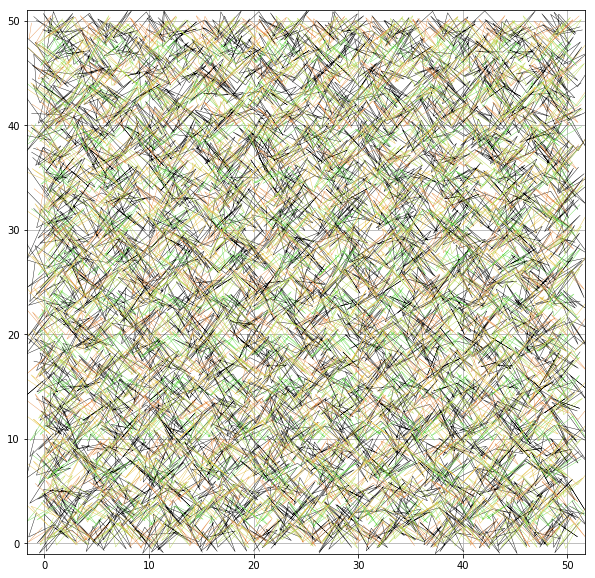

In [303]:
x = [1,-1,1,-1,1,-1, -2,0 , -2,0,-2,0]
x = np.array(x)
y = [1,-1]
y = np.array(y)


for b in range(2):
    for a in range(25):

        N = 115
        n = np.arange(N) 

        dn = int(8*np.random.random()) + ((4*a)%12)

        X = np.zeros(N)
        Y = np.zeros(N)

        X = x[(n + dn) % 12] + 0.45*n + 0.5*(np.random.random(N) - 0.5)
        Y = y[n % 2] + 1 + 2*a + 2*(np.random.random(N) - 0.5)

        plt.plot(X,Y, 'k-', linewidth=0.4)

        #plt.plot(X,Y, 'k.', markersize=1)
    
for a in range(25):
    
    N = 115
    n = np.arange(N) 
    
    dn = int(8*np.random.random())

    X = np.zeros(N)
    Y = np.zeros(N)

    X = x[(n + dn) % 12] + 0.45*n + 0.5*(np.random.random(N) - 0.5)
    Y = y[n % 2] + 1 + 2*a + 1*(np.random.random(N) - 0.5)

    if (a % 2 == 0):
        plt.plot(X,Y, '-', color="#E6924C", linewidth=0.4)
    if (a % 2 == 1):
        plt.plot(X,Y, '-', color="#6CD950" , linewidth=0.4)

        
for a in range(25):
    
    N = 115
    n = np.arange(N) 
    
    dn = 0*int(12*np.random.random()) + ((6*a)%12)

    X = np.zeros(N)
    Y = np.zeros(N)

    X = x[(n + dn) % 12] + 0.45*n + 0.5*(np.random.random(N) - 0.5)
    Y = y[n % 2] + 1 + 2*a + 1*(np.random.random(N) - 0.5)

    if (a % 2 == 0):
        plt.plot(X,Y, '-', color="#B7D950", linewidth=0.4)
    if (a % 2 == 1):
        plt.plot(X,Y, '-', color="#E6C34E" , linewidth=0.4)

plt.axis("Equal")

#plt.xticks(5*np.arange(10), ["" for n in range(5)] )
#plt.yticks(5*np.arange(10), ["" for n in range(5)] )

plt.xlim([-1,51])
plt.ylim([-1,51])
plt.grid(True)